# THE SPARKS FOUDATION

## DATA SCIENCE AND BUSINESS ANALYTICS (GRIP JUNE'21)

### #TASK 1

#### DONE BY: SAKSHI YADUMOHAN SINGH

#### Task name: Prediction using Supervised ML

#### Objective: Predict the percentage of an student based on the no. of hours they study.

dataset provided: http://bit.ly/w-data

# Importing Libraries

In [0]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Importing Dataset

In [13]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploring the data

In [14]:
#Checking for the nun values
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [17]:
#Information of data (Getting familiarize)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
data.shape

(25, 2)

In [20]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data visualization

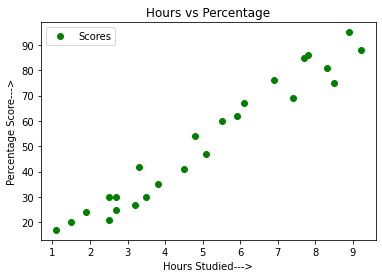

In [30]:
data.plot(x='Hours', y='Scores',color='green',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied--->')  
plt.ylabel('Percentage Score--->')  
plt.show()

**From the graph above, we can say that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [25]:
train = data.iloc[:, :-1].values  
test = data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [26]:
#Using train_test_split method
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size=0.2, random_state=0) 

### **Building and Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [27]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(train, test) 

print("Training complete.")

Training complete.


In [29]:
print("Coefficient:-", regressor.coef_)
print("Intercept:-",regressor.intercept_)

Coefficient:- [9.77580339]
Intercept:- 2.483673405373196


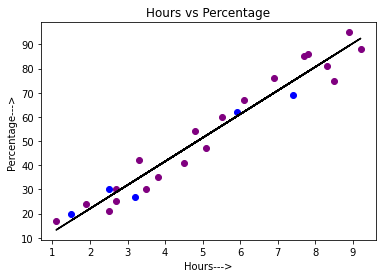

In [36]:
# Defining and Plotting the regression line
line = regressor.coef_*train+regressor.intercept_

# Plotting for the test data
plt.scatter(X_train,y_train,label= "Train Data", color= "purple")
plt.scatter(X_test,y_test,label= "Test Data", color= "blue")
plt.plot(train, line, color= "black", label= "Linear Regression line" );
plt.title("Hours vs Percentage")
plt.xlabel("Hours--->")
plt.ylabel("Percentage--->")
plt.show()

### **Actual vs Predicted**
 (looking for deviations, if any)
 Now that we have trained our algorithm, it's time to make some predictions.

In [37]:
y_pred = regressor.predict(X_test) # Predicting the scores
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [38]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


In [40]:
# We can also train and test with your own data
print("Training Score:",regressor.score(X_train,y_train))
print("Testing Score:",regressor.score(X_test,y_test))

Training Score: 0.9512837351709387
Testing Score: 0.9491748734859171


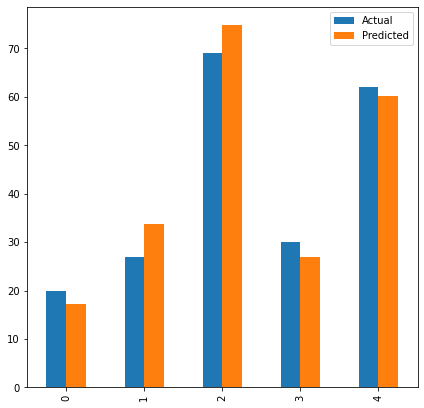

In [44]:
df.plot(kind="bar", figsize=(7,7))
plt.show()

# Predicting the score for the 9.25 hours/day of study

In [45]:
#Testing with our own data

hours= 9.25
pred_score= regressor.predict([[9.25]])
print("No. of hours= {}".format(hours))
print("Predicted score= {}".format(pred_score[0]))


No. of hours= 9.25
Predicted score= 92.90985477015731


### Conclusion

In [ ]:
So our model is showing that after 9.25 hours of studying per day, the predicted score will be around 92.90%

### **Evaluation of the model**

In [47]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Exaplained Variance score:', metrics.explained_variance_score(y_test, y_pred)) 
print('R-2:', metrics.r2_score(y_test, y_pred)) 

Mean Absolute Error: 4.071877793635608
Mean Squared Error: 20.1389481299402
Root Mean Squared Error: 4.487643939746134
Exaplained Variance score: 0.951522433518808
R-2: 0.9491748734859171


# Thankyou